In [348]:
import pandas as pd

#regex for general word processing
import re
import numpy as np

#plotting stuff
import matplotlib.pyplot as plt
%matplotlib inline

#I'll be doing a lot of counting using Counter()
import collections

#OK so it's simple and not magic but it works
hashtag_regex = re.compile(r'\#(\w*)')

# Sources

NBC News is publishing its database of more than 200,000 tweets that Twitter has tied to "malicious activity" from Russia-linked accounts during the 2016 U.S. presidential election.


https://developers.slashdot.org/story/18/02/17/0038251/nbc-publishes-200000-tweets-tied-to-russian-trolls



The original file has some junk in it which we have to delete before opening with Pandas :

Tweets from confirmed Russian trolls, shows only username, timestamp (in UTC), tweet text, and number of times tweet was retweeted and favorited according to our data",,,,,,,,,,,,,,,,,

From NBC News' story: https://www.nbcnews.com/tech/social-media/now-available-more-200-000-deleted-russian-troll-tweets-n844731,,,,,,,,,,,,,,,,,

"If you publish using the data, please credit NBC News and include a link to this page. Send questions to ben.popken@nbcuni.com or twitter.com/bpopken.",,,,,,,,,,,,,,,,,

Twitter screenname,Date tweet sent,Tweet text,Times retweeted,Times favorited,,,,,,,,,,,,,

ryanmaxwell_1,3/22/2016 18:31,#IslamKills Are you trying to say that there were no terrorist attacks in Europe before refugees were let in?,,,,,,,,,,,,,,,



# Minimal cleanup of the CSV


In [ ]:
fp = file('streamlined_tweets.csv','r')
print ''.join(fp.readlines()[:5])

In [86]:
fp = file('streamlined_tweets.csv','r')
fe = file('fakenews_tweets.csv','w')

with fe as piggy:
    for L in fp.readlines()[3:]:
        piggy.write(L)

df = pd.read_csv('fakenews_tweets.csv')

so the data now looks OK 
there are still a few NaNs in the **Tweet text**
column but this isn't so important.

I decided to rename the columns as it made following examples easier

1. everything to lower case
1. swap out spaces to underscores

In [429]:
' '.join( list( df.columns.values)[:])

'twitter_screenname date_tweet_sent tweet_text times_retweeted times_favorited Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16 Unnamed: 17 doy'

In [268]:
rename_mapper = {}
for x in df.columns.values[:5]:
    rename_mapper[x] = x.lower().replace(' ','_')
rename_mapper

{'Date tweet sent': 'date_tweet_sent',
 'Times favorited': 'times_favorited',
 'Times retweeted': 'times_retweeted',
 'Tweet text': 'tweet_text',
 'Twitter screenname': 'twitter_screenname'}

In [287]:
#Do an inplace as this is a fair chunk of data
df.rename(index=str, 
          columns=rename_mapper,
          copy=False,
          inplace=True)
df.columns.values[:5]

array(['twitter_screenname', 'date_tweet_sent', 'tweet_text',
       'times_retweeted', 'times_favorited'], dtype=object)

so now we can just run a regex on the column 

In [640]:
pokemon_regex = re.compile(r'pokemon', re.IGNORECASE)
# for some reason the fancy indexer won't work with NaN 
# so we have to set a flag to False
mask_pokemon = df.tweet_text.str.contains(pokemon_regex, na=False)

In [641]:
df[mask_pokemon][:5]

,twitter_screenname,date_tweet_sent,tweet_text,times_retweeted,times_favorited,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,doy
401,queenofthewo,1/2/2017 15:00,#2017SurvivalTips never ever talk about Pokemo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
797,queenofthewo,7/30/2016 15:48,#IHatePokemonGoBecause it's the precursor to t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212
1168,cassieweltch,7/27/2016 10:49,RT @davethedave_: #IProcrastinateBy creating s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209
1691,mr_clampin,7/30/2016 15:23,RT @CoffeeNTrees: #IHatePokemonGoBecause It gi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212
2209,melvinsroberts,7/30/2016 15:51,#IHatePokemonGoBecause it makes me look like a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212


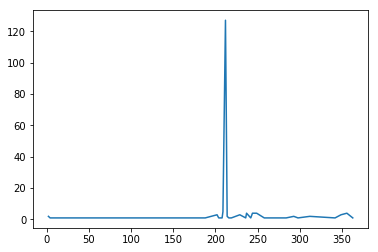

In [642]:
pokemon_date_data  = collections.Counter(df[mask_pokemon].doy).items()
pokemon_date_data.sort()
XS,YS = zip(*pokemon_date_data)
plt.plot(XS,YS)

# Pokemon Go fans

So let's take someone who has tweeted about Pokemon at random.
She is apparently influential according to Twitter but I don't see why

https://docs.google.com/spreadsheets/d/1pWrCg2L-TGNA6sJzZFjRWQdqOOJHKpArYnPho6j5p10/edit#gid=64548838

In [644]:
subject = df[ df.twitter_screenname == 'traceyhappymom']
stuff = subject.tweet_text.values
stuff = stuff.reshape((-1,))

In [682]:
unique = list(set(hashtag_regex.findall(' '.join(stuff))))
' '.join(unique)

' HillaryClinton ThingsInventedWhileHigh Upsideof2016 Olympics SometimesItsOkTo tweetjustyourvoice AxlRose IWishIHadTwo ThreeWordsAllMe wishfultrumpheadlines NEVERTRUMP UnlikelyWikiLeaks sundaybrunch UpsideOf2016 sorrynotsorry probabletrumpstwe WhenImDownI AndThatsHowIWentViral ImNotOpposedTo vegan FilmsFromIreland facebook AthleticsTVShows ILove__ButIHate__ 2016in4words mpy SNL Lifestage NerdHolidays Talking Playlist porn IHateRadio wrestling GrammarNazi humantrafficking BigBucksNoWhammies FunnyOrCoolStuffWhereILive depression SongMakesMeTearUp TheAffair IWantCreditFor MyBedroomIn3Words ThingsIWouldntThankYouFor ReunionTour MakeAHorrorFilmLessScary SaturdaySchmooze AddAMovieRuinAMovie RuinADinnerInOnePhrase dealbreakerin3words ItsMuchBetterTo MyOlympicSportWouldBe Metal ElectionFinalThoughts ThanksTrump TrumpsMexicoTripSayings BadNewYearsToasts KenBone Beypnce 4Words1Movie Queen MFRWorg Periscope TipsToSurviveAPowerOutage SaidNoOneEver donttalktome GuardiansOfTheGalaxyVol2 ActuallyAut

In [371]:
def indexer2tweet_txt(indexer):
    return '\n'.join(indexer.tweet_text.values.reshape((-1,)) )

In [681]:
trump_regex = re.compile('trump',re.IGNORECASE)
putin_regex = re.compile('putin',re.IGNORECASE)
hilary_regex = re.compile('hillary',re.IGNORECASE)
sanders_regex = re.compile('sanders',re.IGNORECASE)

cp = putin_regex
#cp = hilary_regex
mask = subject.tweet_text.str.contains(cp,na=False)
print indexer2tweet_txt(subject[mask])

RT @JohnFPLane: Just spoke to Putin. Fantastic, great guy. Knows a great deal when he sees it. Sold him the White House! #probabletrumpstwe…
RT @DoompaAlioompa: #ProbableTrumpsTweets
I'll be Putin on the Ritz if you don't text back
RT @Born_To_DYE: #TrumpsFavoriteHeadline Putin admits: 'Trump is my hero.'
RT @WhiteCollarCMDY: #ProbableTrumpsTweets
Invites go out to Putin, Jong-un, Khomeini, Duterte and Mugabe--poker at my house, winner gets t…


In [684]:
mask = df.tweet_text.str.contains('#ProbableTrumpsTweets', na=False)
print indexer2tweet_txt(df[mask])[:200]

RT @theolcaper: #ProbableTrumpsTweets I'm not only a client I'm the U.S. President
RT @scottwilks: #ProbableTrumpsTweets

Elections are all RIGGED! Unless I win with less votes than my opponent!
RT 


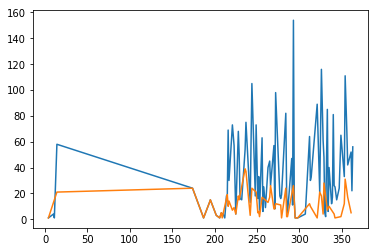

In [691]:
for kk in [subject.doy, subject[~mask].doy]:
    pp = collections.Counter(kk).items()
    pp.sort()
    XS,YS = zip(*pp)
    plt.plot(XS,YS)

In [692]:
mask = subject.tweet_text.str.startswith('RT ')
#print '\n'.join(subject[~mask].tweet_text.values)


In [708]:
subject[(subject.times_retweeted.notnull()) & (subject.times_retweeted >0)]

,twitter_screenname,date_tweet_sent,tweet_text,times_retweeted,times_favorited,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,doy
94411,traceyhappymom,10/10/2016 15:35,#BetterAlternativeToDebates If Trump and Hilla...,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284
167525,traceyhappymom,11/7/2016 15:53,#2016ElectionIn3Words Everybody vs. Trump,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312


# Rough Analysis

This is just screwing around to see what is in the file.

### Todo

I should really feed this through an **NLP** pipeline.

In [311]:
AA = df.twitter_screenname.values
BB = df.tweet_text.values

In [58]:
names = set( AA.reshape((-1,)))

In [63]:
txts =  list(BB.reshape((-1,)))

In [72]:
txts = [x.replace('\n',' ') + '\n' for x in txts if type(x) == str]

so here there are a load of texts about Pokemon.

- What does this prove? 
- Why didn't they clean the data?
- Do those pesky Russians spies want to prove they are real people?

In [92]:
pokemon = [x for x in txts if 'pokemon' in x.lower()]
len(pokemon)

181

# Add day of the year (doy) column 

we want to plot frequencies of tweets

In [379]:
df.date_tweet_sent[-10:].values

array(['7/15/2016 17:36', '5/28/2016 13:43', '10/16/2016 13:08',
       '4/7/2016 12:08', '11/24/2016 13:52', '11/1/2016 12:13',
       '6/18/2015 1:04', '1/10/2017 18:50', '11/20/2016 21:49',
       '12/19/2016 23:00'], dtype=object)

In [397]:

def date_to_nth_day(date, format='%m/%d/%Y'):
    date = pd.to_datetime(date, format=format)
    new_year_day = pd.Timestamp(year=date.year, month=1, day=1)
    return (date - new_year_day).days + 1

def doy(x):
    if isinstance(x,str):
        return date_to_nth_day(x.split()[0])
    else:
        #return a default fake value out of the normal range
        return -1
    
dates = [doy(x) for x in  df.date_tweet_sent[:].values]

add these as they will be useful for plotting later

In [440]:
df.loc[:,'doy'] = pd.Series(dates, index=df.index)

0     82
1    284
2     53
Name: doy, dtype: int64

# Analysis of frequencies

This is just simple "traffic" analysis..



In [468]:
date_data  = collections.Counter(dates)

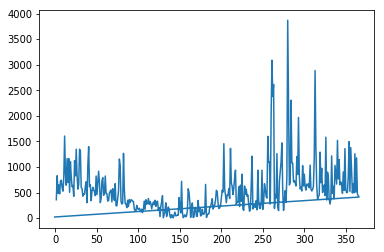

In [470]:
XS,YS = zip(*date_data.items())
plt.plot(XS,YS)

In [489]:
mask = df.tweet_text.str.contains(trump_regex, na=False) 
#careful returns a dictionnary
date_data  = collections.Counter(df[mask].doy).items()

In [597]:
date_data.sort(key = lambda x: -x[1])

So let's look at the **top 10** days for traffic.

There is aperiod of 4 days of intense activity 260-263.

The election was held on November 8, 2016 = 313

There were debates on the following days :

- P1	September 26, 2016	9 p.m. 
- VP	October 4, 2016	9 p.m. 
- P2	October 9, 2016	8 p.m. CDT	
- P3	October 19, 2016	6 p.m. PDT	
- P4	October 25, 2016	7 p.m. MDT	


SOURCE : https://en.wikipedia.org/wiki/United_States_presidential_election,_2016#Primary_election_debates


In [599]:
for x,y in date_data[:10]:
    print y, str(pd.to_datetime(2016 * 1000 + x, format='%Y%j')).split()[0], x


1472 2016-11-08 313
1435 2016-09-17 261
1291 2016-10-06 280
987 2016-09-18 262
956 2016-09-16 260
944 2016-09-19 263
826 2016-10-07 281
713 2016-11-09 314
545 2016-09-29 273
519 2016-09-23 267


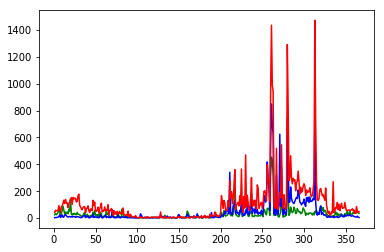

In [486]:
styles = ['r','b','g']
obama_regex = re.compile('obama',re.IGNORECASE)
for cp in [obama_regex, hilary_regex, trump_regex]:
    mask = df.tweet_text.str.contains(cp, na=False)
    date_data  = collections.Counter(df[mask].doy)
    XS,YS = zip(*date_data.items())
    plt.plot(XS,YS, styles.pop())

## Extracting Tweets for a day

And here is how to extract what was said about Trump or whoever on a 
particular day of the year = doy

In [603]:
print '\n'.join( df[( df.doy == 280) & (df.tweet_text.str.contains(hilary_regex)) ].tweet_text.values)[:1000]

RT @Darren32895836: After Hillary Clinton Caught 4attempting 2take advantage of Americans hardships &amp;tears changes Strat #PrayForFlorida ht…
RT @gerfingerpoken: Did IRS Leak Trump Returns 2 Help Hillary? https://t.co/EWkqWLPAQN American Thinker https://t.co/L7h6rlr1le  https://t.…
RT @sweetatertot2: DNC leaked emails show Hillary Camp's plans to meet with Megyn Kelly Team to discuss "future hits" on Trump? Sick! https…
RT @MathewSHarrison: .@HillaryClinton's top aide &amp; #MuslimBrotherhood operative Huma Abedin hates Jews- didn't see that coming..
https://t.…
Foke Prankster reporter horrifies New Yorkers by announcing Hillary Clinton has ZIKA https://t.co/vlLroBVwCQ #Foke
I can't stop 😂😂

Just watch this "high energy" Hillary's rally! 

Explain me how can the polls be favorable to her?… https://t.co/bUpNaTKGgQ
RT @Houseman75: I'm a Coal Miner from Indiana. I don't need New Doubts about Hillary. I already have plenty. #TrumpPence16
RT @phillyrich1: TIM KAINE SHOC


## Who tweeted the most over the period 260-264

In [519]:
mask =  (df.doy > 259) & (df.doy <264)
chunk = df[mask]

In [526]:
tweet_freqs = collections.Counter(chunk.twitter_screenname.values).items()
tweet_freqs.sort( key=lambda x:-x[1])

In [531]:
tweet_freqs[:20]

[('ameliebaldwin', 2176),
 ('hyddrox', 1464),
 ('rh0lbr00k', 1133),
 ('kateritterrrr', 734),
 ('finley1589', 512),
 ('dorothiebell', 500),
 ('cassishere', 298),
 ('jacquelinisbest', 267),
 ('wadeharriot', 249),
 ('karenparker93', 246),
 ('hollydler', 199),
 ('cynthiamhunter', 199),
 ('prettylaraplace', 189),
 ('_nickluna_', 182),
 ('ten_gop', 139),
 ('patriotblake', 111),
 ('garrettsimpson_', 85),
 ('cookncooks', 73),
 ('pamela_moore13', 60),
 ('usa_gunslinger', 55)]

Does it look like a Zipf ?

https://en.wikipedia.org/wiki/Zipf%27s_law

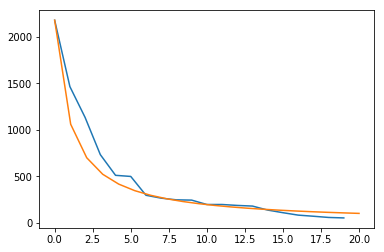

In [546]:
names,YS = zip(*tweet_freqs[:20])
plt.plot(YS)
#comparison curve
TS = np.linspace(0,20,20)
plt.plot(TS,2176/(TS + 1) )

In [744]:
#can slice this to get top5 etc
top10 = [df[df.twitter_screenname == x[0]] for x in tweet_freqs[:10]]

#reference these for later
number1 = top10[0]
number2 = top10[1]

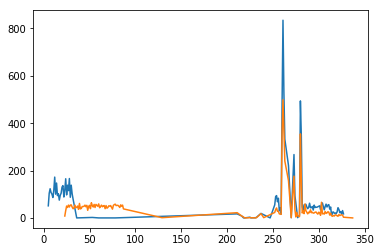

In [674]:
for X in top10[:2]:
    XS,YS = zip(*collections.Counter(X.doy.values).items())
    plt.plot(XS,YS)

In [676]:
print '\n'.join( number2[number2.doy < 100 ].tweet_text.values)[:500]

RT @K1erry: The Marco Rubio knockdown of Elizabeth Warren no liberal media outlet will cover https://t.co/Rh391fEXe3
RT @TrumpSuperPAC: Obama's a Muslim &amp; this video from @FoxNews proves it! Even @CNN admits Obama's training protesters/jihadists! #MAGA htt…
RT @schotziejlk: .@greta Who is your #SuperBowl favorite?
RT @jefe_viejo: Dem Civil War: Pelosi Fires Back at Warren | LifeZette https://t.co/5GsJVPRnXH
RT @wretchardthecat: People believe from instinct.  The Roman gods became ridiculou


In [677]:
fp = file('number1.txt','w')
with fp as dump:
    dump.write('\n'.join( number1[ (number1.doy > 259) & (number1.doy < 265) ].tweet_text.values) )

## Retweets


So most if not all of these are retweets 

so what ?

In [679]:
rt_regex = re.compile('RT @([\w|_]+)')

tweet_bags = [ kk[ (259 < kk.doy ) & (kk.doy < 265) ].tweet_text for kk in top10[:2] ] 
orig_tweeters = [ x.str.extract(rt_regex) for x in tweet_bags]

/Users/macbuse/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [585]:
A = set(orig_tweeters[0])
B = set(orig_tweeters[1])

In [588]:
C = A.intersection(B)

# Original unretweeted stuff 

This is a fecker - to invert the mask you have to use (tilde) !!

In [622]:
mask = number1.tweet_text.str.startswith('RT ')
print '\n'.join(number1[~mask].tweet_text.values)

In a year of #OscarsSoWhite, a Mexican film-maker quietly dominates the #AcademyAwards #OscarHasNoColor https://t.co/uKR…
#ThanksObama glad you're gone.
Hillary’s resistance only aggravates the situation #ReleaseClintonsMedicalRecords #ImNotWithHer
The first president of the US was born today in 1732 #HappyBirthdayGeorgeWashington https://t.co/CIfUJBVn83
CALLING ON ALL #TRUMP_VOTERS  URGENT‼️ #TrumpPence16  #TrumpForPresident  #PodestaEmails33  PLEASE RT RT RT ‼️ https://t… #TrumpForPresident
It's either working class "kills" her, or she kills working class
So make your choice!!!! #tcot https://t.co/LkLqJIT1o6
You'd better read it before watching #debates 
https://t.co/wPo3W6sVU5
"#ThanksObama What Obama leaves behind:
Tax plans of Clinton v Trump. #ImNOTwithHer #Hillary #Trump https://t.co/B8tZRON8Dl
Our life is impossible without our leader! We remember you #HappyBirthdayGeorgeWashington https://t.co/ShT3Ddgckn
Never forget #HappyBirthdayGeorgeWashington
#ThanksObama Obama's tenure w

In [648]:
mask = number2.tweet_text.str.startswith('RT ')
print '\n'.join(number2[~mask].tweet_text.values)[:500]

Muslims firebomb bus in Paris
Refugees still welcome? #refugeeswelcome  
https://t.co/9vyPTctgMN
I just don't agree with #OscarsSoWhite ... It's not to do with race, it's to do with when a film is released #OscarHasNoColor
This is a no no.  #PodestaEmails34 https://t.co/JA8DixdXMl #wikileaks #TrumpPence16 https://t.co/cHMWoqWnEf #TrumpForPresident
#ReleaseClintonsMedicalRecords If there’s nothing to be afraid of, what’s the problem, show the records!
Interesting point on the first presidenti


# Retweet and favorited

So number1 on the list doesn't seem to be that influential using this as a metric

In [757]:
kk = top10[5]
kk[(kk.times_retweeted >5)].sort_values(by=['doy'])

,twitter_screenname,date_tweet_sent,tweet_text,times_retweeted,times_favorited,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,doy
98219,dorothiebell,8/2/2016 23:26,This is getting serious. This calls for seriou...,59.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215
187744,dorothiebell,9/16/2016 17:07,#CrookedHillary tries to blame Trump for being...,56.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260


In [722]:
df.times_retweeted.max()

20494.0

## Distribution of retweet numbers

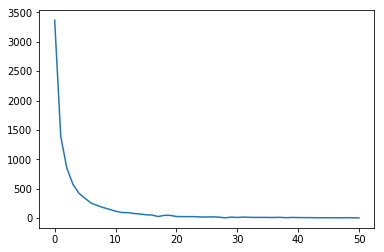

In [735]:
trt = [ int(x)/50 for x in df.times_retweeted[(df.times_retweeted >1)] ]
trt = collections.Counter(trt)
XS,YS = zip(*trt.items()[:50])
plt.plot(XS,YS)

In [748]:
big_hitters = df.twitter_screenname[(df.times_retweeted >1000)]
top_tweets = collections.Counter(big_hitters).items()

In [751]:
top_tweets.sort(key=lambda x:-x[1])

Apparently I'm not the only one to notice that **ten_gop** is a big hitter

https://edition.cnn.com/2018/02/16/politics/who-is-ten-gop/index.html

but this one is still active

https://twitter.com/hashtag/Pamela_Moore13?src=hash

In [800]:
top_tweets

[('ten_gop',
  'pamela_moore13',
  'crystal1johnson',
  'southlonestar',
  'gloed_up',
  'usa_gunslinger',
  'thefoundingson',
  'trayneshacole',
  'jenn_abrams',
  'tpartynews',
  'luke_jones13',
  'blk_voice',
  'patriototus',
  'redlanews',
  'blacknewsoutlet',
  'bleepthepolice',
  'realten_gop',
  'jeblary2016',
  'pigeontoday'),
 (271, 61, 36, 8, 7, 6, 5, 5, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1)]

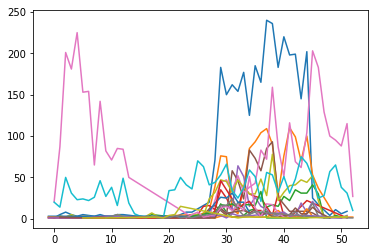

In [814]:
for name in zip(*top_tweets)[0][:]:
    rt_data = df[(df.twitter_screenname == name)]
    cc = collections.Counter(rt_data.doy//7 ).items()
    cc.sort()
    XS,YS = zip(*cc)
    plt.plot(XS,YS)

But I'm more interested in the number 2

In [784]:
pm_data = df[(df.twitter_screenname == 'pamela_moore13')& (df.times_retweeted >1000) ].sort_values(by=['doy'])

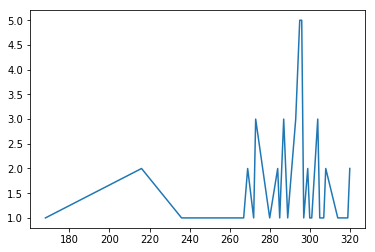

In [786]:
cc = collections.Counter(pm_data.doy).items()
cc.sort()
XS,YS = zip(*cc)
plt.plot(XS,YS)

In [780]:
print '\n\n--------------\n'.join(pm_data.tweet_text)

I would rather take care of TEN homeless US Veterans, than 50,000 migrants/illegal aliens.. 
How About You? https://t.co/Fa3H2Krxix

--------------
SORRY Detroit &amp; Flint! Iran needed that $400 million cash more than you did!
#IranRansomScandal https://t.co/ICF0kdbLDN

--------------
France is lost.
#French police try to enter a muslim no-go zone.

We can not allow this in America! https://t.co/JtQyiPMhE1

--------------
"I FIRED Hiliary bc she was a lying, unethical, dishonest attorney!" — Jerry Zeifman
#HillarysEmails
#NeverHillary https://t.co/ercOxBJAjz

--------------
#HillaryClinton hung out with guy with White Power tattoo then deleted the tweet
Let's help her not to forget this!😏 https://t.co/befwhFmGvn

--------------
V.P of MLK Society delivers a passionate speech to African Americans on behalf of Donald Trump https://t.co/07OZqsBAq9

--------------
Conway on polls tightening: "Mr. Trump is doing this w/out the support of all Republicans &amp; it's quite remarkable." https

In [792]:
pm = df[(df.twitter_screenname == 'pamela_moore13')]
pm_mask = pm.tweet_text.str.startswith('RT ')
pm[pm_mask].sort_values(by='doy')

,twitter_screenname,date_tweet_sent,tweet_text,times_retweeted,times_favorited,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,doy
9196,pamela_moore13,7/21/2016 18:46,RT @PatriotByGod: #RNCinCLE When color becomes...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203
159322,pamela_moore13,7/22/2016 22:24,"RT @wikileaks: RELEASE: 19,252 emails from the...",0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204
49028,pamela_moore13,7/27/2016 2:40,RT @fabrightwing: DNC is empty. Dems have had ...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209
90720,pamela_moore13,7/29/2016 19:26,RT @ChristiChat: 😂 Can't make this crap up!\n...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211
62074,pamela_moore13,7/29/2016 22:46,RT @SheriffClarke: With the world on fire I'll...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,211
150517,pamela_moore13,8/26/2016 22:59,RT @MissouriNewsUS: Trump is NOT a racist! htt...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239
12316,pamela_moore13,8/27/2016 1:19,RT @MissLizzyNJ: I think most women would agre...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240
165098,pamela_moore13,8/27/2016 18:09,RT @RealTEN_GOP: Twitter locked me out of my a...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240
10293,pamela_moore13,8/30/2016 22:42,RT @MissouriNewsUS: Hillary Clinton Is Sliding...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243
152141,pamela_moore13,8/30/2016 19:33,"RT @sweetatertot2: Funny Trump was only ""racis...",0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243


# Distribution of tweets over the day

In [669]:
def hour(x):
    tx = x.split()[1]
    return int(tx.split(':')[0])

tweet_times_freqs = []
for X in top10:
    tt = [hour(x) for x in X.date_tweet_sent.values]
    tt = collections.Counter(tt).items()
    tt.sort()
    tweet_times_freqs.append(tt)

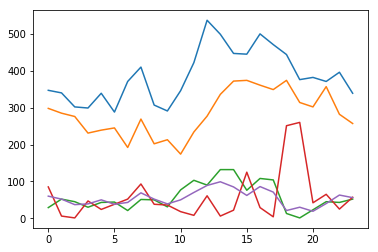

In [781]:
#tweet times for the top 5
for X in tweet_times_freqs[:5]:
    XS,YS = zip(*X)
    plt.plot(XS,YS)

This doesn't seem unusual either - troughs around commuting times.
Though they do seem to be very active in the afternoon

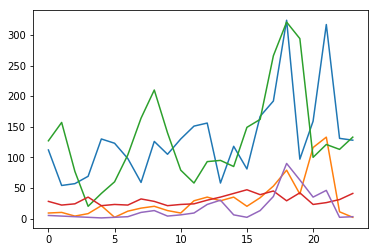

In [672]:
for X in tweet_times_freqs[5:10]:
    XS,YS = zip(*X)
    plt.plot(XS,YS)

# Hashtag analysis

I'm not going to do anything complicated but here we go

In [111]:
data = file('amalgam_txts.txt','r').read()

In [322]:
tags = hashtag_regex.findall(data)
tags = list(set(tags))
tags.sort()

In [247]:
clinton = [x for x in tags if 'clinton' in x.lower()]
clinton = list(set(clinton))
clinton.sort()

In [249]:
#associated_words(clinton,['clintons','hilary'])

In [696]:
bill = [x for x in clinton if 'bill' in x.lower()]
hil = [x for x in clinton if 'hillary' in x.lower() ]

we have to write a filter to clean things up 
using a list of **stop words**

In [234]:
def associated_words(tags, omit=['']):
    stop_words = omit + ['bill','hillary','clinton','2016','16','_'] 
    old = ' '.join(tags)
    stuff = old.lower()
    for x in stop_words:
        stuff = stuff.replace(x,'')
    return set(stuff.split())

In [233]:
associated_words(hil)

{'arrest',
 'corrupt',
 'criminal',
 'crooked',
 'forpresident',
 'indict',
 'rotten',
 'scripted',
 'searchterms',
 'theliesof'}

In [697]:
obama = [x for x in tags if 'obama' in x.lower()]
trump = [x for x in tags if 'trump' in x.lower()]

In [793]:
' '.join(associated_words(trump, omit=['trumps','trump','pence']))


'indallas preident liar nomoredoublestandard newtvshows donaldunfit2leadorgovern therealdonald protest ga fbicodename president1sttantrum hate romcom baron unitedamericansfor ocalypse tr ego fakeintelligencebriefing stuffisafraidof riots rejectedcampaignslogans acandy parisagainst womenfor advantage fav utin presidentdonaldj fam newhampshirefor presidency neverers altrightfilms tra penna4 p reich team blackout revolution ispres tea welcomedemocrats4 isnolaughingmatter go isnotmypresident nomorelies ter rapist troops cast cantstump movement inauguration never imwithohio inorlando address cult narratesplanetearth 100 taxevader tapes bikers4 forpresidens potus inspired forpresident boo ocrats ohiovotes4 lgbtq4 blackoutreachsobad msrally firstmonth ismypresident campaign win realdonald replace bikersfor ians internationalhotel teampa u wfl usa army voters fl4 ca4 nonovote leaks call certified lovewon gays4 stopdonald stump4baby drseuss train presidentelectdonaldj baby tx4 whyimvoting kla g

In [794]:
america = [x for x in tags if 'america' in x.lower()]
' '.join(associated_words(america, omit=['american','america']) )

'greats restore keepbeautiful gods unitedsfortrump makerichagain recyclesday yourvote ursurystatesof fir allrejects inspiring bornagain wrongfor makeworkagain bendover black 4 makegr include hates sniper dad votetrumpsave wtfin5words hostage isdoomed patriot matters energyplan libertyhour wakeaup makegreata feminine4trump guns slivesmatter makefirst deathto transformin5words shehates callbank wasnevergreat decides people gophatess letsmakegreatagain 1st howtosurvivetrumps eagle wetooare thisisslastchance keepsafeagain blacks heartassociation makejimcrowagain makegreatgreatagain makedate won values democratsdestructionof cgi riseup lefthates saveow struefeelingsabout unitedstatesof makestrongagain norefugeesin antitrumpis antirhetoric makesafeagain horrorstory ojmadein makegreenagain makeg stupids gunsin honest s muslims militia trumps obamas makegre makehealthyagain first 4alls hatess godbless one letsmakegreat savetheworker anti disgraceto fake miss makesickagain save tellitsgreat get